In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan_data.csv


For this notebook project, we will explore a loan data  which connects people who need money (borrowers) with people who have money (investors). We try to predict whether an investor will invest in people who showed a profile of borrowers with some features.


# 1.Import Libraries and Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [3]:
df=pd.read_csv("../input/loan_data.csv")
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


# 2.Exploratory Data Analysis

In [4]:
df.info() 
#There 9578 rows and 14 columns in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [5]:
df.describe(include="all") 
#Here we get overall statistical information about the data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


*here wreate a histogram of two FICO distributions on top of each other, one for each credit.policy outcome

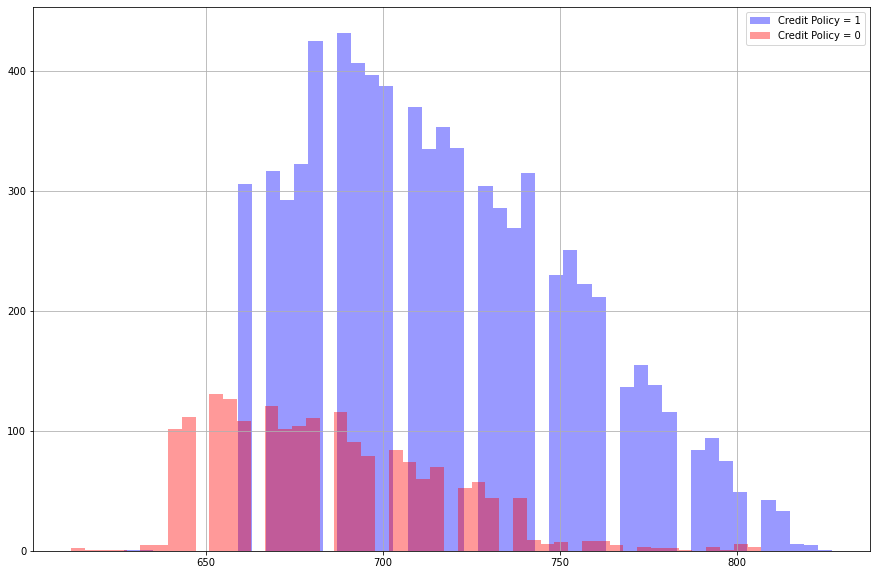

In [6]:
plt.figure(figsize=(15,10))
df[df["credit.policy"] == 1]["fico"].hist(color="blue",bins=50,label="Credit Policy = 1",alpha=0.4)
df[df["credit.policy"] == 0]["fico"].hist(color="red",bins=50,label="Credit Policy = 0",alpha=0.4)
plt.legend()
#here we make two different histogram one for those who have credit policy 1 score and the other for those who have 0 score
# we compare their relative fico credit scores

*This figure shows that people who have lower FICO score tends to have a credit policy of 0,
this means that they do not meet the criteria of borrowing money

*People who have 660 or fewer fico socre do not meet the criteria 

In [7]:
df[df["credit.policy"] == 1]["fico"].iplot(kind="hist",bins=24,colors="blue")
df[df["credit.policy"] == 0]["fico"].iplot(kind="hist",bins=24,colors="orange")
#Here we do the same histogram with iplot library because it is interactive
# this means that when we click somewhere we can get exact score 

* Now we will create a similar figure, except this time select by the not.fully.paid column as our target column

*

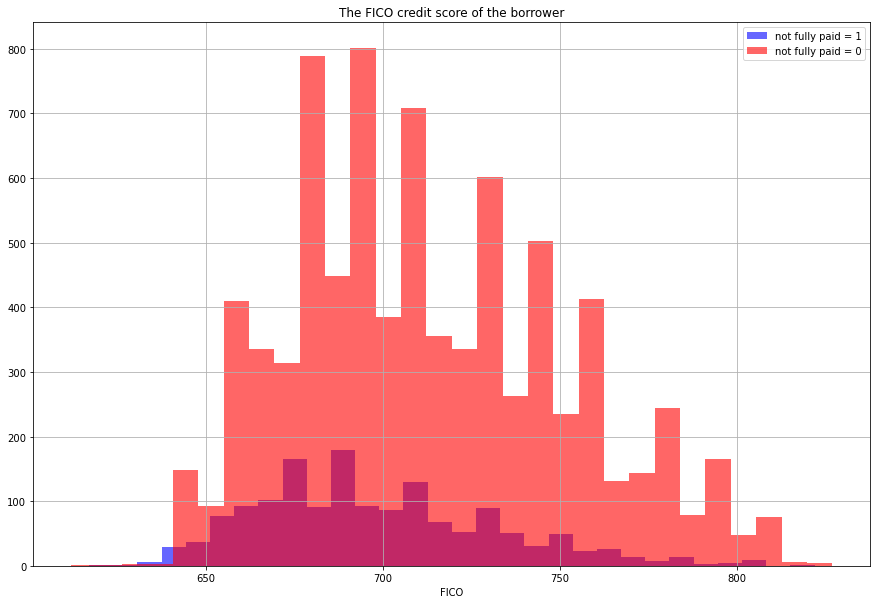

In [8]:
plt.figure(figsize=(15,10))
df[df["not.fully.paid"] ==1]["fico"].hist(label="not fully paid = 1",alpha=0.6,color="blue",bins=30)
df[df["not.fully.paid"] ==0]["fico"].hist(label="not fully paid = 0",alpha=0.6,color="red",bins=30)
plt.xlabel("FICO")
plt.title("The FICO credit score of the borrower")
plt.legend()

*The figure shows that the majority of people pay these loans

*The loans fully paid or not fully paid has almost the same distribution, but those not fully paid has lower fico scores

*Here we create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. 

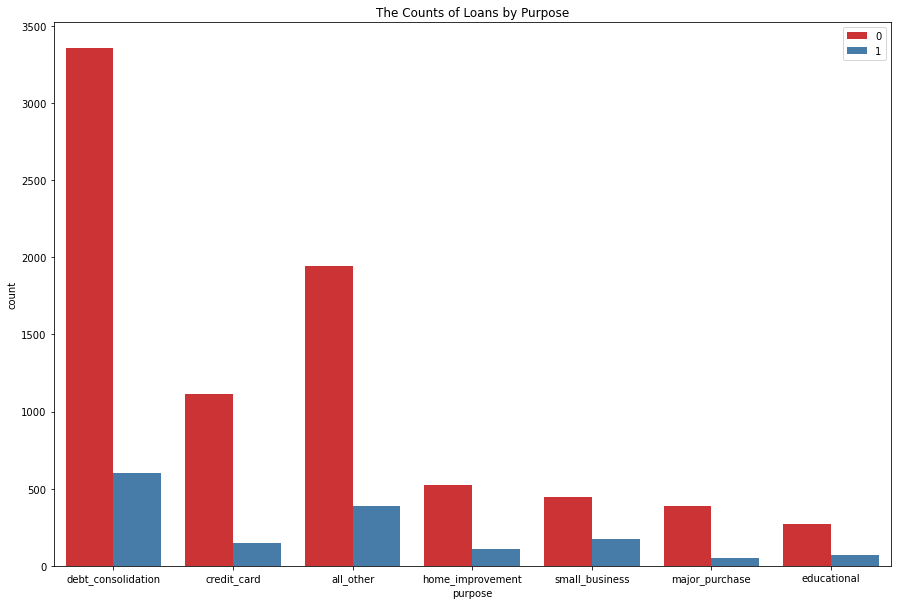

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x="purpose",hue="not.fully.paid", data=df, palette="Set1")
plt.title("The Counts of Loans by Purpose")
plt.legend()

*Based on countplot of purpose of loan, we can say that debt consolidation is the most popular reason for loan

*Secondly the ratio of fully paid and not fully paid is almost similar across different purposes of loan

* Here we will see the trend between FICO score and interest rate with the following jointplot

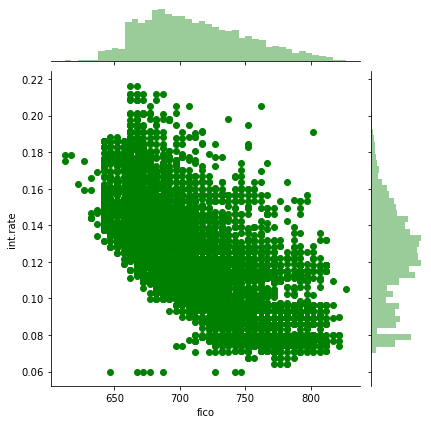

In [10]:
sns.jointplot(x="fico",y="int.rate",data=df,color="green",space=0.2)

*The figure above shows that the more fico score increase, the lower interest rate people have better credit get and vice versa

* Here we create the following lmplots to see whether the trend between not.fully.paid and credit policy columns. 

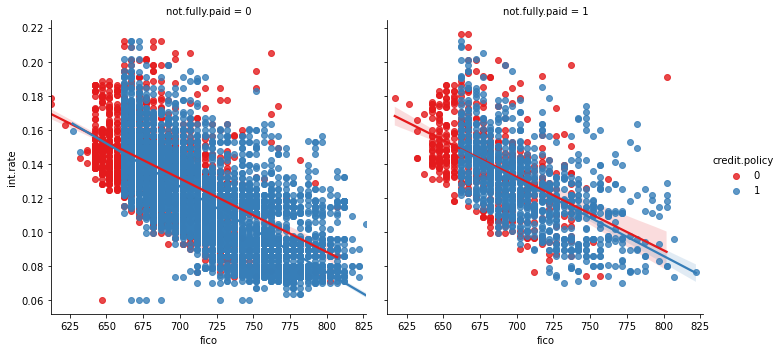

In [11]:
sns.lmplot(x="fico",y="int.rate",data=df,palette="Set1",hue="credit.policy",col="not.fully.paid")

*col parameter of lmplot  gives us the possiblity to create more than one plot according to the number of items inside defined column

*for example in the column "not fully paid", we have just two value, so we get two separate plots because we assigned "not fully paid" as col parameter

*Here we get more detailed version of the previous plot and get more complex relationship between columns in a single plot

# 3. Feature Engineering:



In [12]:
df.info() # we look again the overall information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


*We need to dela with categorical columns 

*We have  a categorical column as **purpose** column 

*This means we need to transform the values in this column by using dummy variables so sklearn will be able to understand them. 

In [13]:
cat_feature=["purpose"]
final_data= pd.get_dummies(df,columns=cat_feature,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.

It turns a categorical variable into a series of zeros and ones, which makes them a lot easier to quantify and compare.

In [14]:
final_data.head()
#Now all of the features in the data has been tranformed into 0 and 1 by adding a new column for each of them

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## 4. Splitting the Data and Training Decision Three Model

*Now its time to split our data into a training set and a testing set before applying the algorithm

*we use sklearn to split our data into a training set and a testing set

In [15]:
X=final_data.drop("not.fully.paid",axis=1) # All of the columns except from the target column has assigned as the X
y=final_data["not.fully.paid"] # "not.fully.paid" column has been assigned as the target column

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # Here we split our data as training and test dataset

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train) 

DecisionTreeClassifier()

* Here we create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

## 5. Predictions and Evaluation of Decision Tree Model

**We will make predictions from the test set and create a classification report and a confusion matrix to compare the results

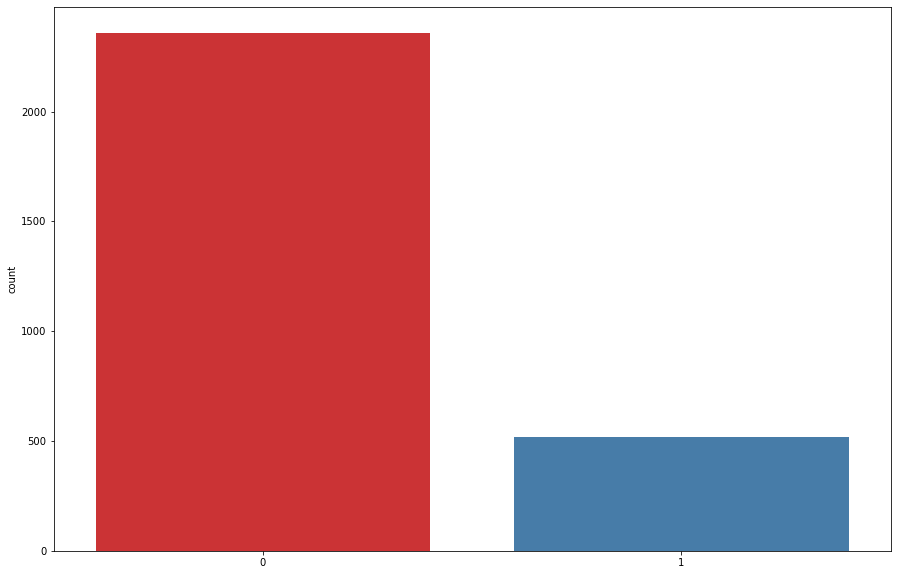

In [18]:
predictions=dtree.predict(X_test)
#df_pred=pd.DataFrame(predictions)
plt.figure(figsize=(15,10))
sns.countplot(predictions,palette="Set1")


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2411
           1       0.21      0.24      0.22       463

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.74      2874



*According to classification report; 
            Precision:True Positive/Total Predicted Positivemacro average of precision(averaging the unweighted mean per label) 0.54(%85 for 0's and %22 for 1's);weighted average (averaging the support-weighted mean per label) is 0.75
            



In [20]:
print(confusion_matrix(y_test,predictions))

[[2004  407]
 [ 353  110]]


According to confusion matrix; 

            -True Negatives: 2019
            -False Positive:398
            -False Negative:345
            -True Positive:112

*The results are not good, so we will try Random Forest Model and compare the results with Decision Tree Model

## 6. Training the Random Forest model

*Now its time to train our new model

* we will create an instance of the RandomForestClassifier class and fit it to our training data from the previous step

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=300)

In [22]:
rfc.fit(X_train,y_train) # We make th new algorithm fit with the training set
rfc_predictions=rfc.predict(X_test) #We make the algorith to predict y test values

## 7. Predictions and Evaluation



**Now we will create a classification report from the results. 

In [23]:
print(classification_report(y_test,rfc_predictions))
print(5*"\n")
print(confusion_matrix(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2411
           1       0.32      0.02      0.04       463

    accuracy                           0.84      2874
   macro avg       0.58      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874







[[2392   19]
 [ 454    9]]


*When we compare the results from both of the models we use, Random Forest model performs better than Decision Tree Model

*However, when it comes to the resuts for target column=1 of recall and f1 score, Decision Tree Model performs far better than the other one

*Therefore, before choosing an algorithm we have to keep in mind our priorities and pros and cons of different ML models

**Show the Confusion Matrix for the predictions.**

**What performed better the random forest or the decision tree?**

# Great Job!